In [1]:
import pandas as pd
import math
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon, LineString, MultiPolygon
import descartes
import numpy as np
from pyproj import Proj, transform
%matplotlib inline

In [2]:
## Cambio de coordenadas
## Res: estados.shp
estados1 = 'conjunto_de_datos/00ent.shp'
mex1 = gpd.read_file(estados1)
#mex1

In [9]:
mex1

,CVEGEO,CVE_ENT,NOMGEO,geometry
0,01,01,Aguascalientes,"POLYGON ((-102.28788 22.35552, -102.28754 22.3..."
1,02,02,Baja California,"MULTIPOLYGON (((-112.30127 28.29752, -112.2988..."
2,03,03,Baja California Sur,"MULTIPOLYGON (((-109.89496 22.81140, -109.8950..."
3,04,04,Campeche,"MULTIPOLYGON (((-91.95592 20.14797, -91.95579 ..."
4,05,05,Coahuila de Zaragoza,"POLYGON ((-102.31081 29.78125, -102.31051 29.7..."
5,06,06,Colima,"MULTIPOLYGON (((-114.73807 18.33333, -114.7372..."
6,07,07,Chiapas,"POLYGON ((-91.97307 17.87537, -91.96936 17.874..."
7,08,08,Chihuahua,"POLYGON ((-107.65348 31.68063, -107.65347 31.6..."
8,09,09,Ciudad de México,"POLYGON ((-99.11108 19.51602, -99.11469 19.512..."
9,10,10,Durango,"POLYGON ((-105.96755 26.70313, -105.93942 26.6..."


In [3]:
proj = '+proj=lcc +lat_1=17.5 +lat_2=29.5 +lat_0=12 +lon_0=-102 +x_0=2500000 +y_0=0 +a=6378137 +b=6378136.027241431 +units=m +no_defs'
myProj = Proj(proj)

In [4]:
geometry = mex1['geometry']
for idx, est in mex1.iterrows():
    try:
        proy = [myProj(i[0],i[1],inverse=True) for i in est['geometry'].exterior.coords]
        geometry[idx] = Polygon(proy)
    except:
        proy = [[myProj(i[0],i[1],inverse=True) for i in j.exterior.coords] for j in est['geometry']]
        polygons = [Polygon(i) for i in proy]
        geometry[idx] = MultiPolygon(polygons)
mex1['geometry'] = geometry
#mex1

In [5]:
mex1.to_file('conjunto_de_datos/Estados/estados.shp')

In [6]:
geo_df = gpd.read_file('conjunto_de_datos/Terrenos/terrenos.shp')
geo_df.head()

,Title,Address,Descripcio,Precio,TamaÃ±o,Latitud,Longitud,Tamano,Precio/Tam,geometry
0,LagunasInterior . Punta TiburÃ³n Residencial; ...,Km. 4.5 Carretera Federal Boca del RÃ­o - AntÃ...,Punta tiburÃ³n residencial se encuentra en la ...,769500.0,180 mÂ²,19.067293,-96.080747,180.0,4275.000000,POINT (-96.08075 19.06729)
1,La Escondida Residencial â Terrenos,Octava Avenida y Veracruz||RincÃ³n de La Sierr...,La Escondida ResidencialResidencias y Lotes de...,711000.0,140 mÂ²,25.641346,-100.198342,140.0,5078.571429,POINT (-100.19834 25.64135)
2,El Molino Residencial & Golf,Paseos El Molino # 302; LeÃ³n; Gto||Balcones d...,El Molino; Residencial & GolfEs un impresionan...,845719.0,250 mÂ²,21.185639,-101.699237,250.0,3382.876000,POINT (-101.69924 21.18564)
3,Club Cenote Residencial,Ruta de los Cenotes Km 19 DesviaciÃ³n Delirios...,Club Cenote ResidencialAmplios Terrenos en el ...,1039000.0,800 mÂ²,20.847873,-87.220608,800.0,1298.750000,POINT (-87.22061 20.84787)
4,Punta TiburÃ³n Residencial; Marina & Golf - Bo...,Km. 4.5 Carretera Federal Boca del RÃ­o - AntÃ...,Punta tiburÃ³n residencial se encuentra en la ...,723672.0,180 mÂ²,19.067293,-96.080747,180.0,4020.400000,POINT (-96.08075 19.06729)


In [7]:
def cuadricula(xmin,ymin,xmax,ymax, m, n):
    x_step = (xmax-xmin)/m
    y_step = (ymax-ymin)/n
    
    cols = np.linspace(xmin, xmax, m+1)
    rows = np.linspace(ymin, ymax, n+1)

    #cols = list(range(int(np.floor(xmin)), int(np.ceil(xmax)), x_step))
    #rows = list(range(int(np.floor(ymin)), int(np.ceil(ymax)), y_step))
    #rows.reverse()
    rows = np.flip(rows)
    cols = cols[:-1]
    rows = rows[:-1]

    polygons = []
    for x in cols:
        for y in rows:
            polygons.append( Polygon([(x,y), (x+x_step, y), (x+x_step, y-y_step), (x, y-y_step)]) )

    grid = gpd.GeoDataFrame({'geometry':polygons})
    return grid

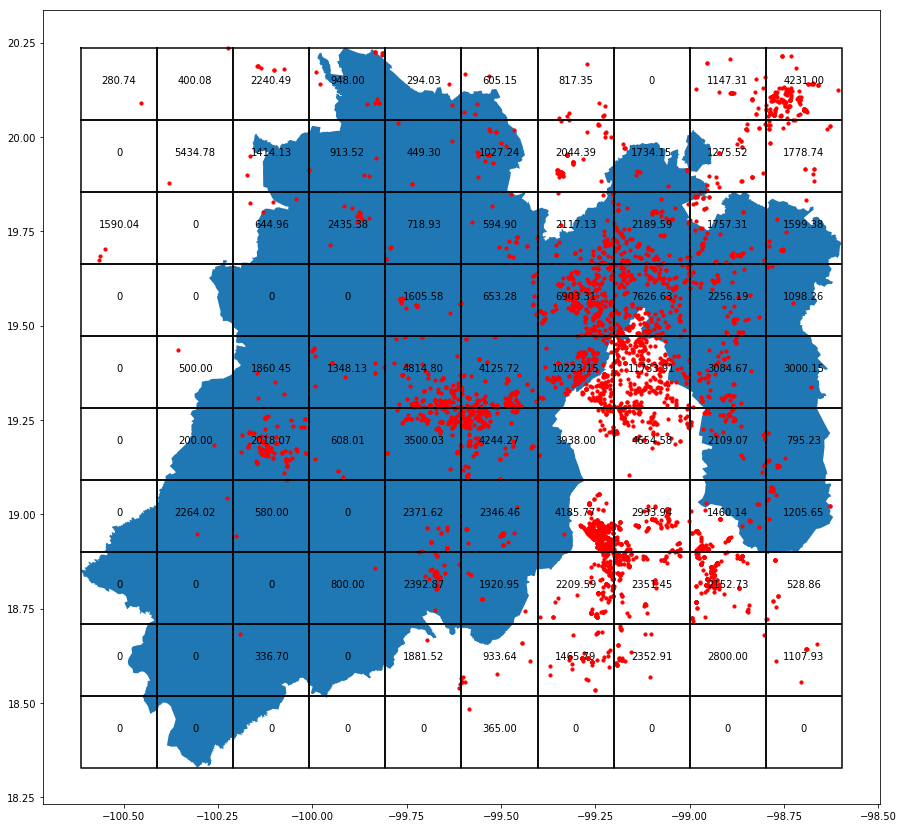

In [12]:
fig, ax = plt.subplots(figsize=(15,15))

#Para correr sobre un solo estado

mex1[(mex1['NOMGEO'] == 'México')].plot(ax=ax)
xmin,ymin,xmax,ymax = mex1[(mex1['NOMGEO'] == 'México')].total_bounds

#Para correr con estados particulares

#mex1[(mex1['NOMGEO'] == 'Yucatán') | (mex1['NOMGEO'] == 'Campeche') | (mex1['NOMGEO'] == 'Quintana Roo')].plot(ax=ax)
#xmin,ymin,xmax,ymax = mex1[(mex1['NOMGEO'] == 'Yucatán') | (mex1['NOMGEO'] == 'Campeche') | (mex1['NOMGEO'] == 'Quintana Roo')].total_bounds

#Para correr sobre todo México

#mex1.plot(ax=ax)
#xmin,ymin,xmax,ymax = mex1.total_bounds
#cuadricula(xmin,ymin,xmax,ymax, 10,10)['geometry'][0:5].plot(ax=ax, alpha=0.5, linewidth=0.5)
cuad = cuadricula(xmin,ymin,xmax,ymax, 10,10)
area_trabajo = geo_df[(geo_df['Latitud']>=ymin) & (geo_df['Latitud']<=ymax) 
    & (geo_df['Longitud']>=xmin) & (geo_df['Longitud']<=xmax)]
for poly in cuad['geometry']:
    x,y = poly.exterior.xy
    c1,c2=poly.centroid.xy
    #print(c1,c2)
    #print(x[0],y[0])
    cantidad=0
    prom=0
    for idx, row in area_trabajo.iterrows():
        #print(row['geometry'])
        if poly.contains(row['geometry']):
            prom += row['Precio/Tam']
            cantidad += 1
    if cantidad>0:
        prom=prom/cantidad
        prom = "%.2f" % prom
    plt.plot(x,y, color='black')
    plt.annotate(s=str(prom), xy=(c1[0],c2[0]), horizontalalignment='center')
area_trabajo.plot(ax = ax, markersize = 10, color = 'red', marker = 'o')
plt.show()